* To compared the overall averaged surface salinity between bathymetry 5 & 2.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools,rivertools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.})

In [2]:
## load bathymetry
grid2 = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc')
grid5 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea5.nc')

In [3]:
## load averaged file
gridT_2 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/Average_nowcast/1629_T.nc')
gridT_5 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14days_norefraserxml/16jun15/1629_5_T.nc')

In [15]:
## extract averaged salinity
S_1629_2 = gridT_2.variables['vosaline'][0]
S_1629_5 = gridT_5.variables['vosaline'][0]
lon = gridT_2.variables['nav_lon']
lat = gridT_2.variables['nav_lat']

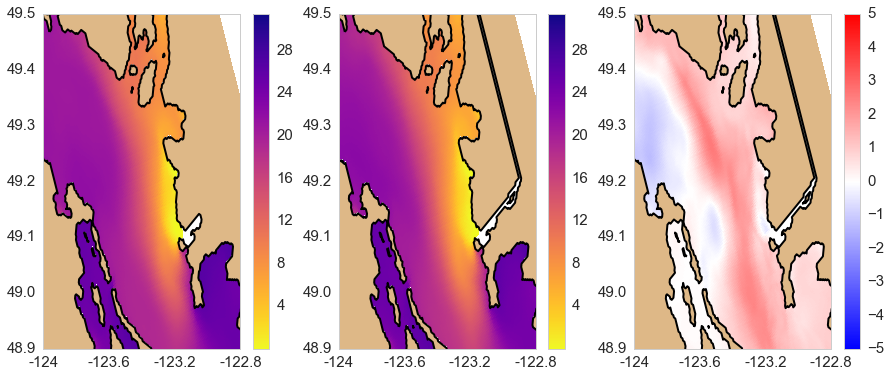

In [18]:
fig, axs = plt.subplots(1,3,figsize = (15,6))
for ax,S,grid in zip([axs[0],axs[1]], [S_1629_2,S_1629_5], [grid2,grid5]):
    mesh = ax.pcolormesh(lon,lat,np.ma.masked_values(S[0],0),cmap = 'plasma_r') ## look a te surface
    cbar = fig.colorbar(mesh, ax =ax)
    viz_tools.plot_land_mask(ax,grid,coords='map',color='burlywood')
    viz_tools.plot_coastline(ax, grid, coords = 'map')
ax = axs[-1]
mesh = ax.pcolormesh(lon,lat,np.ma.masked_values(S_1629_2[0] - S_1629_5[0],0), vmin = -5, vmax = 5,cmap = 'bwr')
cbar = fig.colorbar(mesh,ax =ax)
viz_tools.plot_land_mask(ax,grid5,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid5, coords = 'map')
for ax in axs:
    ax.set_xlim([-124.,-122.8])
    ax.set_xticks([-124,-123.6,-123.2,-122.8])
    ax.set_xticklabels([-124,-123.6,-123.2,-122.8])
    ax.set_ylim([48.9,49.5])